# Assignment 1: Data Science 
## Emilio Espinosa 


## Load data

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
df = pd.read_csv('/content/drive/MyDrive/AdvancedData/Assignment1/curated_gene_disease_associations.tsv', delimiter='\t')

In [7]:
df.head()

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.857,0.172,C0019209,Hepatomegaly,phenotype,C06;C23,Finding,0.3,NaN,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.857,0.172,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.3,NaN,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.564,0.724,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.4,0.848485,1998.0,2016.0,3,0,CTD_human
3,2,A2M,0.564,0.724,C0007102,Malignant tumor of colon,disease,C04;C06,Neoplastic Process,0.3,NaN,2004.0,2004.0,1,0,CTD_human
4,2,A2M,0.564,0.724,C0009375,Colonic Neoplasms,group,C04;C06,Neoplastic Process,0.3,NaN,2004.0,2004.0,1,0,CTD_human


In [10]:
df.describe()

,geneId,DSI,DPI,score,EI,YearInitial,YearFinal,NofPmids,NofSnps
count,8.174600e+04,81620.000000,81598.000000,81746.000000,22862.000000,73123.000000,73123.000000,81746.000000,81746.000000
mean,6.214032e+05,0.577307,0.569338,0.345747,0.956704,2006.373179,2010.641194,1.377853,0.982751
std,7.676491e+06,0.136227,0.226062,0.112264,0.142197,7.937566,5.954987,2.594623,14.596577
min,1.000000e+00,0.251000,0.034000,0.010000,0.000000,1916.000000,1952.000000,0.000000,0.000000
25%,2.638000e+03,0.479000,0.414000,0.300000,1.000000,2003.000000,2007.000000,1.000000,0.000000
50%,5.428000e+03,0.572000,0.621000,0.300000,1.000000,2008.000000,2011.000000,1.000000,0.000000
75%,1.028000e+04,0.663000,0.759000,0.320000,1.000000,2012.000000,2015.000000,1.000000,0.000000
max,1.095801e+08,1.000000,0.966000,1.000000,1.000000,2018.000000,2018.000000,124.000000,2343.000000


## Growth Process

Text(0.5, 1.0, 'Initial Year')

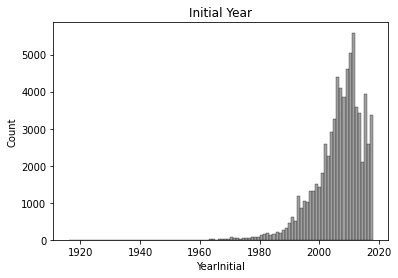

In [13]:
# hist(df$YearInitial, col='gray', xlab='Initial year', breaks = 100)

sns.histplot(data=df.YearInitial,color='gray',bins=100).set_title('Initial Year')

In [14]:
tb = df.YearInitial
tb.head()

0    2017.0
1    2015.0
2    1998.0
3    2004.0
4    2004.0
Name: YearInitial, dtype: float64

In [24]:
x = sorted(tb.dropna().unique())

In [28]:
y = np.cumsum(tb.value_counts().sort_index())

[Text(0, 0.5, 'Total number of associations'), Text(0.5, 0, 'Year')]

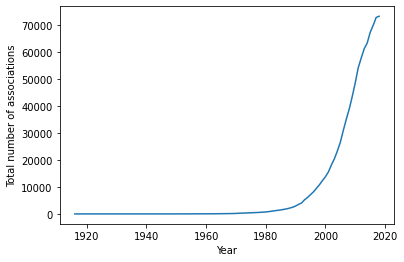

In [38]:
#plot(x,y, pch=19, type='l', xlab='Year', ylab='Total number of associations', lwd=5)
ax = sns.lineplot(x=x,y=y)
ax.set(xlabel='Year', ylabel='Total number of associations')

[Text(0, 0.5, 'Total number of associations'), Text(0.5, 0, 'Year')]

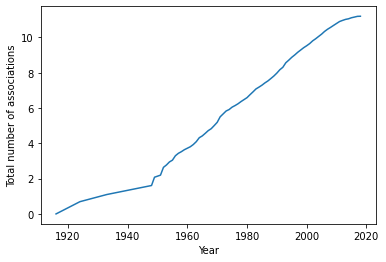

In [39]:
ax = sns.lineplot(x=x,y=np.log(y))
ax.set(xlabel='Year', ylabel='Total number of associations')

In [42]:
logy = np.log(y)/np.log(2)

In [53]:
inds = logy.index>1945
logx = pd.Series(x)

In [54]:
logy[inds].shape

(69,)

In [57]:
inds = np.array(inds)
logx = np.array(logx)
logy = np.array(logy)

In [65]:
reg = LinearRegression().fit(logx[inds].reshape(-1, 1), logy[inds])
y_pred = reg.predict(np.array(logx[inds]).reshape(-1,1))

In [77]:
X2=np.array(logx[inds]).reshape(-1,1)
y2=logy[inds]
model = sm.OLS(y2, X2).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              458.3
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                    6.28e-32
Time:                        15:47:11   Log-Likelihood:                         -192.99
No. Observations:                  69   AIC:                                      388.0
Df Residuals:                      68   BIC:                                      390.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0, 0.5, 'Cumulative number')

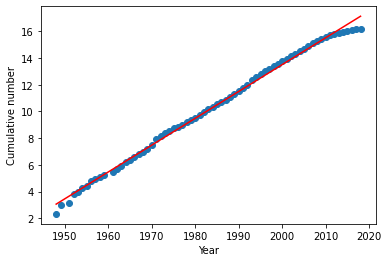

In [80]:
plt.scatter(logx[inds], logy[inds]) 
plt.plot(logx[inds], y_pred,color='r')
plt.xlabel('Year')
plt.ylabel('Cumulative number')

In [78]:
# a <- fit$coefficients[2]
# # the fit already incliudes the term log(2) in our case
# doubling_rate <- 1 / a
# print(paste('The total number of known associations doubles every', signif(doubling_rate,2),'years!'))
reg.coef_

array([0.20112224])

In [79]:
a = reg.coef_
doubling_rate = 1/a
print(f'The total number of known associations doubles every {doubling_rate} years!')

The total number of known associations doubles every [4.97210066] years!
